# Linear Regression
In linear regression we propose a statistical linear relationship between a control or
independent variable $X$ and an outcome, response, or dependent variable $Y$, parameterized
by a slope $a$ and an intercept $b$.
$$
\operatorname{\mathbb{E}}[Y] = a \times X + b
$$
Like all regression models, linear regression attempts to find a optimum values of the 
parameters $a$ and $b$, according to criteria. In the case of linear regression the
criteria requires the line defined by the equation above is a near as possible to all the
data points, according to the Euclidean distance.


In [1]:
# The usual suspects.
%matplotlib widget
import pandas as pd
import matplotlib.pyplot as mp
from sklearn.linear_model import LinearRegression as lr
import numpy as np
import ipywidgets as wg

## Load the Data
We will build a linear regression models of greenhouse gas emissions as a function of
population:
* Population `Data/population-and-demography.csv`
* Emissions `Data/total-ghg-emissions.csv`

In [2]:
# Load our data
population = pd.read_csv("Data/population-and-demography.csv")
emissions = pd.read_csv("Data/total-ghg-emissions.csv")

## Join the Data
Using line regression we will investigate three possible relationships between population
and emissions:
* A linear relationship
* A quadratic relationship
* A log-linear relationship

We begin by creating a new data-frame with one record per nation per year with both
population and emissions.

In [3]:
NationAnnual = pd.merge(
    left = population,
    right = emissions,
    how = "outer",
    left_on = ["Year", "Country name"],
    right_on = ["Year", "Entity"]
)

### Selection Criteria
For our initial work we will analyze a single year of data. We need the following columns:
* Emissions
* Population
* Year
* Nation

We only include data where:
* Code is not null
* Code is not "OWID_WRD"
* Country is not null
* Population is not null
* Emissions is not null
* Year is `2010`

In [4]:
year = 2010
Nation2010 = NationAnnual[
    (NationAnnual["Year"] == year) & 
    (pd.notnull(NationAnnual["Code"])) &
    (pd.notnull(NationAnnual["Country name"])) &
    (pd.notnull(NationAnnual["Population"])) &
    (pd.notnull(NationAnnual["Annual greenhouse gas emissions in CO₂ equivalents"])) &
    (NationAnnual["Code"] != "OWID_WRL")
][
    [
        "Country name",
        "Year",
        "Population",
        "Annual greenhouse gas emissions in CO₂ equivalents"
    ]
]

## Fit the Linear Model
We are using the Linear Regression object that we aliased as `lr` during the import. After
checking the API documentation I know that we are safe to instantiate a new version of the
model with the default parameters.

Our first linear regression investigates emissions as a function of just the population.
$$
\operatorname{\mathbb{E}}[\text{Emissions}] = a \times \text{Population} + b
$$
The physical intuition of this model is that the slope $a$ is the average emissions per
person, while the intercept $b$ is a baseline emissions for a nation with no population.

In [5]:
# Assign the result of fitting to the estimate2010 variable
linear2010 = lr().fit(
    X = Nation2010["Population"].values.reshape(-1, 1),
    y = Nation2010["Annual greenhouse gas emissions in CO₂ equivalents"].values
)

# Take a look at the output
print(f"Intercept: {linear2010.intercept_}")
print(f"Coefficient: {linear2010.coef_[0]}")

Intercept: 46718931.709806144
Coefficient: 5.719793512936672


## Plot the Linear Fit
On X-axis plot population, on the y-axis plot emission then add the linear model.

We are using the imported plotting library aliased as `mp`.

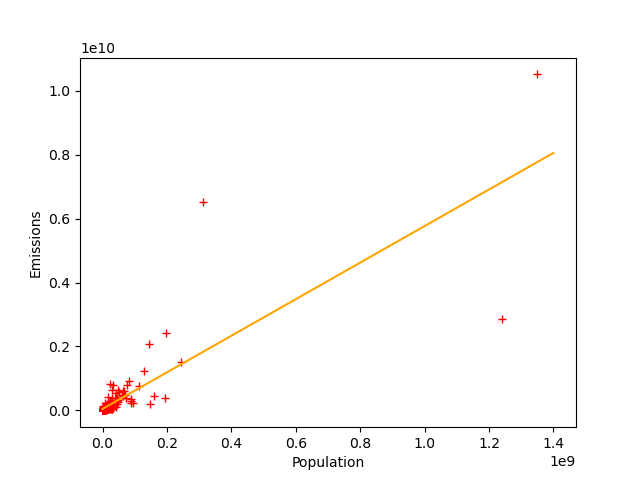

In [6]:
# Blank canvas
linearfg, linearax = mp.subplots()

# Label the axes
linearax.set_xlabel("Population")
linearax.set_ylabel("Emissions")

# The actual data. There is one point per nation.
linearactual, = linearax.plot(
    Nation2010["Population"],
    Nation2010["Annual greenhouse gas emissions in CO₂ equivalents"],
    "+r"
)

# The best fit line. We draw a line between the smallest and largest population
# on the graph -> draw a line between 0 people and 1400000000 billion.
xticks = np.linspace(10**3, 1.4 * 10**9, 100)
linearexpect, = linearax.plot(
    xticks,
    linear2010.predict(xticks.reshape(-1, 1)),
    "orange"
)

## Fit the Quadratic Model

Our next linear regression investigates emissions as a function of the square of the
population.
$$
\operatorname{\mathbb{E}}[\text{Emissions}] = a \times \text{Population}^2 + b
$$
The physical intuition of this model is that the slope $a$ is the average emissions per
possible relationships between people, while the intercept $b$ is a baseline emissions for a
nation with no population.

In [7]:
# Assign the result of fitting to the estimate2010 variable
quadratic2010 = lr().fit(
    X = (Nation2010["Population"].values**2).reshape(-1, 1),
    y = Nation2010["Annual greenhouse gas emissions in CO₂ equivalents"].values
)

# Take a look at the output
print(f"Intercept: {quadratic2010.intercept_}")
print(f"Coefficient: {quadratic2010.coef_[0]}")

Intercept: 167136624.78706902
Coefficient: 4.183802605148442e-09


## Plot the Quadratic Fit
We include the quadratic model on a plot with the linear model.

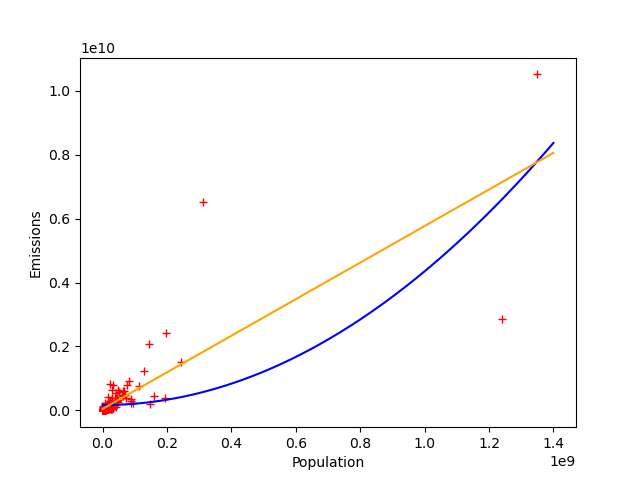

In [8]:
# Blank canvas
quadraticfg, quadraticax = mp.subplots()

# Label the axes
quadraticax.set_xlabel("Population")
quadraticax.set_ylabel("Emissions")

# The actual data. There is one point per nation.
quadraticactual, = quadraticax.plot(
    Nation2010["Population"],
    Nation2010["Annual greenhouse gas emissions in CO₂ equivalents"],
    "+r"
)

# The best fit line. We draw a line between the smallest and largest population
# on the graph -> draw a line between 0 people and 1400000000 billion.
xticks = np.linspace(10**3, 1.4 * 10**9, 100)
quadraticexpect, = quadraticax.plot(
    xticks,
    quadratic2010.predict((xticks**2).reshape(-1, 1)),
    "blue"
)
quadraticax.plot(
    xticks,
    linear2010.predict(xticks.reshape(-1, 1)),
    "orange"
)

## Fit the Log-Linear Model
Our final linear regression investigates emissions as a function of the log-linear of the
population.
$$
\operatorname{\mathbb{E}}[\text{Emissions}] = a \times \text{Population} \times \log(\text{Population}) + b
$$
The physical intuition of this model is that the slope $a$ is the average emissions per
step in a transaction between a producer and a consumer. The logarithm measures how the
number of steps, or social distance between two people increases with population size, while
the intercept $b$ is a baseline emissions for a nation with no population.

In [9]:
# Assign the result of fitting to the estimate2010 variable
loglinear2010 = lr().fit(
    X = (Nation2010["Population"].values*np.log(Nation2010["Population"].values)).reshape(-1, 1),
    y = Nation2010["Annual greenhouse gas emissions in CO₂ equivalents"].values
)

# Take a look at the output
print(f"Intercept: {loglinear2010.intercept_}")
print(f"Coefficient: {loglinear2010.coef_[0]}")

Intercept: 64904105.56091094
Coefficient: 0.2728614381822458


## Plot the Log-Linear Fit
Finally we include the log-linear model with the plot of the quadratic and linear model.

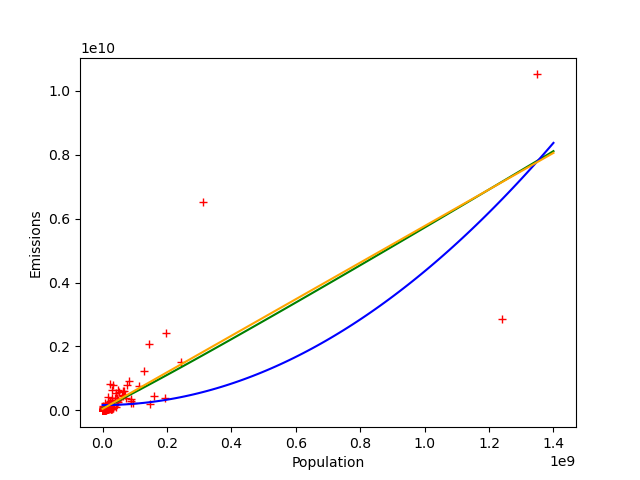

In [10]:
# Blank canvas
loglinearfg, loglinearax = mp.subplots()

# Label the axes
loglinearax.set_xlabel("Population")
loglinearax.set_ylabel("Emissions")

# The actual data. There is one point per nation.
loglinearactual, = loglinearax.plot(
    Nation2010["Population"],
    Nation2010["Annual greenhouse gas emissions in CO₂ equivalents"],
    "+r"
)

# The best fit line. We draw a line between the smallest and largest population
# on the graph -> draw a line between 0 people and 1400000000 billion.
xticks = np.linspace(10**3, 1.4*10**9, 100)
loglinearexpect, = loglinearax.plot(
    xticks,
    loglinear2010.predict((xticks*np.log(xticks)).reshape(-1, 1)),
    "green"
)
loglinearax.plot(
    xticks,
    quadratic2010.predict((xticks**2).reshape(-1, 1)),
    "blue"
)
loglinearax.plot(
    xticks,
    linear2010.predict(xticks.reshape(-1, 1)),
    "orange"
)

## Qualitative Diagnostics
Most nations have population smaller than 100 million, which means we cannot visually assess
how well the models estimate emissions using linear axes. We redraw our plot using a
log-log scale on the axes.


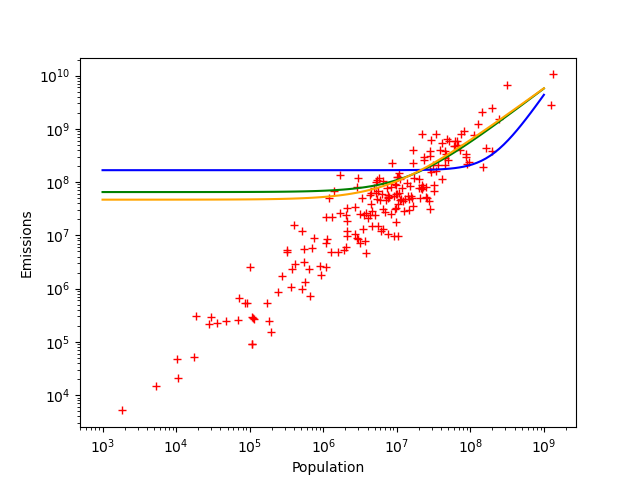

In [11]:
# Blank canvas
loglogfg, loglogax = mp.subplots()

# Label the axes
loglogax.set_xlabel("Population")
loglogax.set_ylabel("Emissions")

# The actual data. There is one point per nation.
loglogactual, = loglogax.loglog(
    Nation2010["Population"],
    Nation2010["Annual greenhouse gas emissions in CO₂ equivalents"],
    "+r"
)

# The best fit line. We draw a line between the smallest and largest population
# on the graph -> draw a line between 0 people and 1400000000 billion.
xticks = 10**np.linspace(3, 9, 100)
loglogexpect, = loglogax.loglog(
    xticks,
    loglinear2010.predict((xticks*np.log(xticks)).reshape(-1, 1)),
    "green"
)
loglogax.loglog(
    xticks,
    quadratic2010.predict((xticks**2).reshape(-1, 1)),
    "blue"
)
loglogax.loglog(
    xticks,
    linear2010.predict(xticks.reshape(-1, 1)),
    "orange"
)

## Hypothesis Revision
From the log-log we can see that all the models fail for nations with less than 100 million
people. The reason for this failure is our faulty assumption that the intercept $b$ is not
zero. This is physically unrealistic as a nation with no people should have no emissions. In
fact, in the log-linear model, a nation with only one person would have no emissions.

Lets rerun the models, asserting that the intercept is zero, and that all the data points
are positive.

In [12]:
# Assign the result of fitting to the estimate2010 variable
linearrevised2010 = lr(
    fit_intercept = False,
    positive = True
).fit(
    X = Nation2010["Population"].values.reshape(-1, 1),
    y = Nation2010["Annual greenhouse gas emissions in CO₂ equivalents"].values
)

# Take a look at the output
print("Linear in Population")
print("--------------------")
print(f"Intercept: {linearrevised2010.intercept_}")
print(f"Coefficient: {linearrevised2010.coef_[0]}")
print()

# Assign the result of fitting to the estimate2010 variable
quadraticrevised2010 = lr(
    fit_intercept = False,
    positive = True
).fit(
    X = (Nation2010["Population"].values**2).reshape(-1, 1),
    y = Nation2010["Annual greenhouse gas emissions in CO₂ equivalents"].values
)

# Take a look at the output
print("Quadratic in Population")
print("-----------------------")
print(f"Intercept: {quadraticrevised2010.intercept_}")
print(f"Coefficient: {quadraticrevised2010.coef_[0]}")
print()

# Assign the result of fitting to the estimate2010 variable
loglinearrevised2010 = lr(
    fit_intercept = False,
    positive = True
).fit(
    X = (Nation2010["Population"].values*np.log(Nation2010["Population"].values)).reshape(-1, 1),
    y = Nation2010["Annual greenhouse gas emissions in CO₂ equivalents"].values
)

# Take a look at the output
print("Log-Linear in Population")
print("------------------------")
print(f"Intercept: {loglinearrevised2010.intercept_}")
print(f"Coefficient: {loglinearrevised2010.coef_[0]}")

Linear in Population
--------------------
Intercept: 0.0
Coefficient: 5.805424916438935

Quadratic in Population
-----------------------
Intercept: 0.0
Coefficient: 4.295510398269294e-09

Log-Linear in Population
------------------------
Intercept: 0.0
Coefficient: 0.2781315713803203


## Rerun Diagnostics
Inspecting the coefficients of each model we can observe for each model:
* The linear model estimates that each person generates $\approx 5.8$ tons of $\text{CO}_2$
per year
* The log-linear model estimates that each degree of separation between a producer and
consumer generates $\approx 278 \times \log(100) = 1.3$ tons of $\text{CO}_2$ per year,
where we are assuming each person knows on average $100$ people.
* The quadratic model estimates that each potential connection between two people
generates $\approx 4.3$ milligrams of $\text{CO}_2$ per year. 

When we log-log plot the models we can see that both the linear and the log-linear models
estimate well for both large and small populations, while the quadratic model is clearly a
poor estimator.

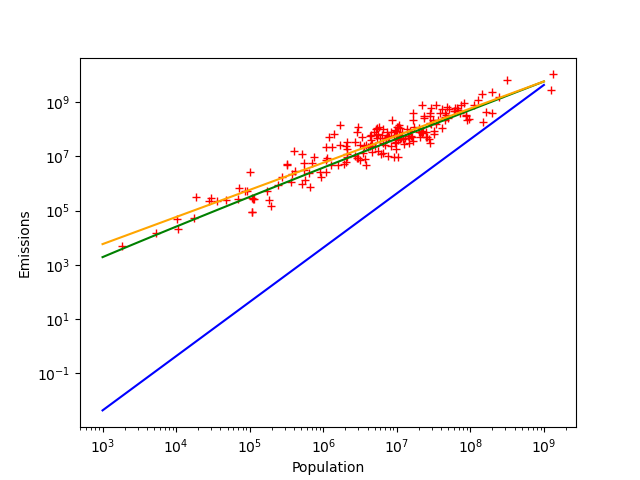

In [13]:
# Blank canvas
revisedfg, revisedax = mp.subplots()

# Label the axes
revisedax.set_xlabel("Population")
revisedax.set_ylabel("Emissions")

# The actual data. There is one point per nation.
revisedactual, = revisedax.loglog(
    Nation2010["Population"],
    Nation2010["Annual greenhouse gas emissions in CO₂ equivalents"],
    "+r"
)

# The best fit line. We draw a line between the smallest and largest population
# on the graph -> draw a line between 0 people and 1400000000 billion.
xticks = 10**np.linspace(3, 9, 100)
revisedexpect, = revisedax.loglog(
    xticks,
    loglinearrevised2010.predict((xticks*np.log(xticks)).reshape(-1, 1)),
    "green"
)
revisedax.loglog(
    xticks,
    quadraticrevised2010.predict((xticks**2).reshape(-1, 1)),
    "blue"
)
revisedax.loglog(
    xticks,
    linearrevised2010.predict(xticks.reshape(-1, 1)),
    "orange"
)

## Quantitative Diagnostics
To quantitatively compare the models you can use a statistical method called the Likelihood
Ratio Test. However, this test requires making strong assumptions about the probability
distributions of the process. In practice you would collaborate with a colleague with
formal statistical training to implement a Likelihood Ratio Test for this set of models.

Finally we will animate all the years from 1950 to 2021

interactive(children=(IntSlider(value=1950, description='year', max=2021, min=1950), Output()), _dom_classes=(…

<function __main__.redraw(year=1950)>

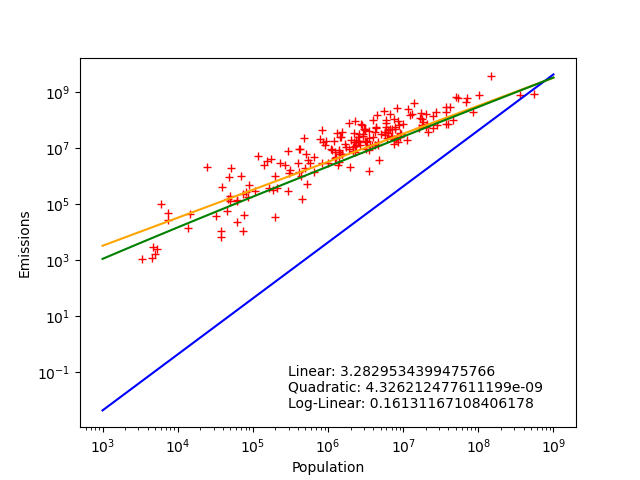

In [14]:
# Select the required data
NationAnimate = NationAnnual[
    (NationAnnual["Year"] >= 1950) &
    (NationAnnual["Year"] <= 2021) & 
    (pd.notnull(NationAnnual["Code"])) &
    (pd.notnull(NationAnnual["Country name"])) &
    (pd.notnull(NationAnnual["Population"])) &
    (pd.notnull(NationAnnual["Annual greenhouse gas emissions in CO₂ equivalents"])) &
    (NationAnnual["Code"] != "OWID_WRL")
][
    [
        "Country name",
        "Year",
        "Population",
        "Annual greenhouse gas emissions in CO₂ equivalents"
    ]
]

# Blank canvas
animatefg, animateax = mp.subplots()

# Label the axes
animateax.set_xlabel("Population")
animateax.set_ylabel("Emissions")

# First pass data
Nation1950 = NationAnimate[NationAnimate["Year"] == 1950]

# Evaluation points
xticks = 10**np.linspace(3, 9, 100)

# The actual data. There is one point per nation.
actualanimate, = animateax.loglog(
    Nation1950["Population"],
    Nation1950["Annual greenhouse gas emissions in CO₂ equivalents"],
    "+r"
)

# Linear model
linearexpected = lr(
    fit_intercept = False,
    positive = True
).fit(
    X = Nation1950["Population"].values.reshape(-1, 1),
    y = Nation1950["Annual greenhouse gas emissions in CO₂ equivalents"].values
)

# Linear plot
linearanimate, = animateax.loglog(
    xticks,
    linearexpected.predict(xticks.reshape(-1, 1)),
    "orange"
)

# Quadratic model
quadraticexpected = lr(
    fit_intercept = False,
    positive = True
).fit(
    X = (Nation1950["Population"].values**2).reshape(-1, 1),
    y = Nation1950["Annual greenhouse gas emissions in CO₂ equivalents"].values
)

# Quadratic plot
quadraticanimate, = animateax.loglog(
    xticks,
    quadraticexpected.predict((xticks**2).reshape(-1, 1)),
    "blue"
)

# Log-linear model
loglinearexpected = lr(
    fit_intercept = False,
    positive = True
).fit(
    X = (Nation1950["Population"].values*np.log(Nation1950["Population"].values)).reshape(-1, 1),
    y = Nation1950["Annual greenhouse gas emissions in CO₂ equivalents"].values
)

# Log-linear plot
loglinearanimate, = animateax.loglog(
    xticks,
    loglinearexpected.predict((xticks*np.log(xticks)).reshape(-1, 1)),
    "green"
)

# Estimated coefficients
coefficients = animatefg.text(
    0.45,
    0.15,
    f"Linear: {linearexpected.coef_[0]}\nQuadratic: {quadraticexpected.coef_[0]}\nLog-Linear: {loglinearexpected.coef_[0]}"
)

# Animate the figure
def redraw(year = 1950):
    NationYear = NationAnimate[NationAnimate["Year"] == year]

    # Actual data
    actualanimate.set_data(
        NationYear["Population"],
        NationYear["Annual greenhouse gas emissions in CO₂ equivalents"]
    )

    # Linear model
    linearexpected.fit(
        X = NationYear["Population"].values.reshape(-1, 1),
        y = NationYear["Annual greenhouse gas emissions in CO₂ equivalents"].values
    )

    # Linear plot
    linearanimate.set_data(
        xticks,
        linearexpected.predict(xticks.reshape(-1, 1))
    )

    # Quadratic model
    quadraticexpected.fit(
        X = (NationYear["Population"].values**2).reshape(-1, 1),
        y = NationYear["Annual greenhouse gas emissions in CO₂ equivalents"].values
    )

    # Quadratic plot
    quadraticanimate.set_data(
        xticks,
        quadraticexpected.predict((xticks**2).reshape(-1, 1))
    )

    # Log-linear model
    loglinearexpected.fit(
        X = (NationYear["Population"].values*np.log(NationYear["Population"].values)).reshape(-1, 1),
        y = NationYear["Annual greenhouse gas emissions in CO₂ equivalents"].values
    )

    # Log-linear plot
    loglinearanimate.set_data(
        xticks,
        loglinearexpected.predict((xticks*np.log(xticks)).reshape(-1, 1))
    )

    # Update coefficients
    coefficients.set_text(
        f"Linear: {linearexpected.coef_[0]}\nQuadratic: {quadraticexpected.coef_[0]}\nLog-Linear: {loglinearexpected.coef_[0]}"
    )

    # Update
    animatefg.canvas.draw_idle()

# Illustrate
wg.interact(redraw, year = (1950, 2021, 1))

## Summary
All of the models have consistent fits year over year. Regardless of the model, the
estimated coefficient of the slope, fixing the intercept at zero, increases year over year
corresponding to the well documented carbon intensification of society through the spread
of industrialization.